#Step01 ▶ importing the essential libraries 🦖 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder # for categorical data
from sklearn.preprocessing import StandardScaler #to scale the data
from keras.preprocessing.image import load_img
import tensorflow as tf
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
import keras # main keras package
from keras.models import Sequential # sequential model
from keras.layers import Dropout, Flatten, AveragePooling2D # layers with layers operations
from keras.layers import Dense,Conv2D  # layers types

#Step02 ▶ Data Loading ⌛

In [2]:
train_data=pd.read_csv('../input/proj-2-final/fashion-mnist_test.csv')
test_data=pd.read_csv('../input/proj-2-final/fashion-mnist_test.csv')

#Step03 ▶ Data Description ⚡

In [3]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 10000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [4]:
train_data.describe()
test_data.describe()

label        pixel1        pixel2        pixel3        pixel4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       4.500000      0.000400      0.010300      0.052100      0.077000   
std        2.872425      0.024493      0.525187      2.494315      2.208882   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000      2.000000     45.000000    218.000000    185.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.208600      0.349200      0.826700      2.321200      5.457800   
std        4.669183      5.657849      8.591731     15.031508     23.359019   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    223.000000    247.000000    218.000000    244.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...     34.320800     23.071900     16.432000     17.870600   
std    ...     57.888679     49.049749     42.159665     44.140552   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     55.000000      6.000000      0.000000      0.000000   
max    ...    254.000000    252.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      22.860000     17.790200      8.353500      2.541600      0.629500   
std       51.706601     45.128107     28.765769     16.417363      7.462533   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    240.000000    225.000000    205.000000   

          pixel784  
count  10000.00000  
mean       0.06560  
std        1.93403  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      107.00000  

[8 rows x 785 columns]

In [5]:
train_data.info(verbose = False)
test_data.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [6]:
type(train_data)
type(test_data)

pandas.core.frame.DataFrame

In [7]:
print('The length of the training data is :- ',len(train_data))
print('The length of the testing data is :- ',len(test_data))

The length of the training data is :-  10000
The length of the testing data is :-  10000


In [8]:
print('The dimensions of the training data is :- ',train_data.shape)
print('The dimensions of the testing data is :- ',test_data.shape)

The dimensions of the training data is :-  (10000, 785)
The dimensions of the testing data is :-  (10000, 785)


In [9]:
print(train_data.head(0))
print(test_data.head(0))

Empty DataFrame
Columns: [label, pixel1, pixel2, pixel3, pixel4, pixel5, pixel6, pixel7, pixel8, pixel9, pixel10, pixel11, pixel12, pixel13, pixel14, pixel15, pixel16, pixel17, pixel18, pixel19, pixel20, pixel21, pixel22, pixel23, pixel24, pixel25, pixel26, pixel27, pixel28, pixel29, pixel30, pixel31, pixel32, pixel33, pixel34, pixel35, pixel36, pixel37, pixel38, pixel39, pixel40, pixel41, pixel42, pixel43, pixel44, pixel45, pixel46, pixel47, pixel48, pixel49, pixel50, pixel51, pixel52, pixel53, pixel54, pixel55, pixel56, pixel57, pixel58, pixel59, pixel60, pixel61, pixel62, pixel63, pixel64, pixel65, pixel66, pixel67, pixel68, pixel69, pixel70, pixel71, pixel72, pixel73, pixel74, pixel75, pixel76, pixel77, pixel78, pixel79, pixel80, pixel81, pixel82, pixel83, pixel84, pixel85, pixel86, pixel87, pixel88, pixel89, pixel90, pixel91, pixel92, pixel93, pixel94, pixel95, pixel96, pixel97, pixel98, pixel99, ...]
Index: []

[0 rows x 785 columns]
Empty DataFrame
Columns: [label, pixel1, pixel

#Step04 ▶ Visualize the data ♋

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


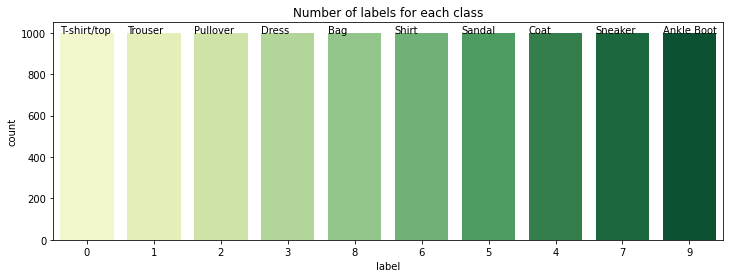

In [10]:
#plot the number of labels for each class in the trainind data
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index, palette='YlGn')
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show() 
    
plot_label_per_class(train_data)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


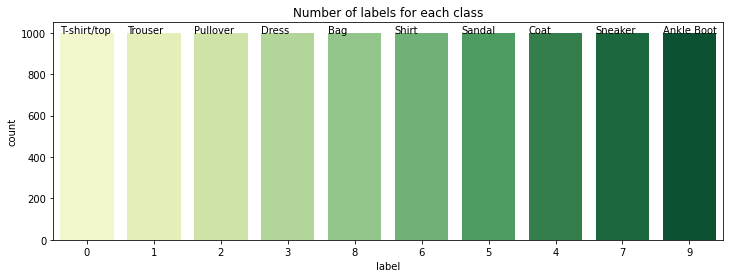

In [11]:
plot_label_per_class(test_data)

<AxesSubplot:xlabel='label'>

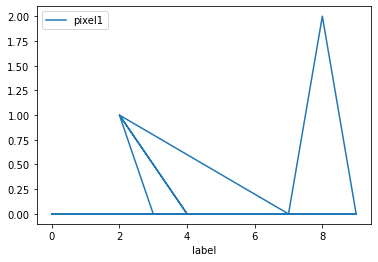

In [12]:
train_data.plot(x="label", y=["pixel1"])

<AxesSubplot:xlabel='label'>

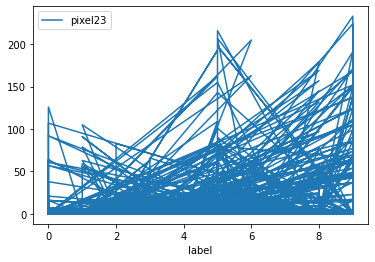

In [13]:
train_data.plot(x="label", y=["pixel23"])

<AxesSubplot:xlabel='pixel34'>

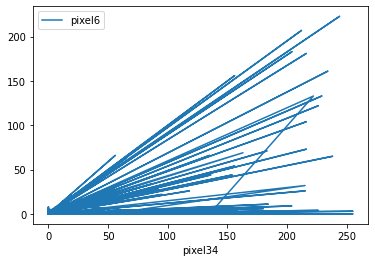

In [14]:
train_data.plot(x="pixel34", y=["pixel6"])

#Step05 ▶ Draw some of the images ✊

In [15]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(28,28)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


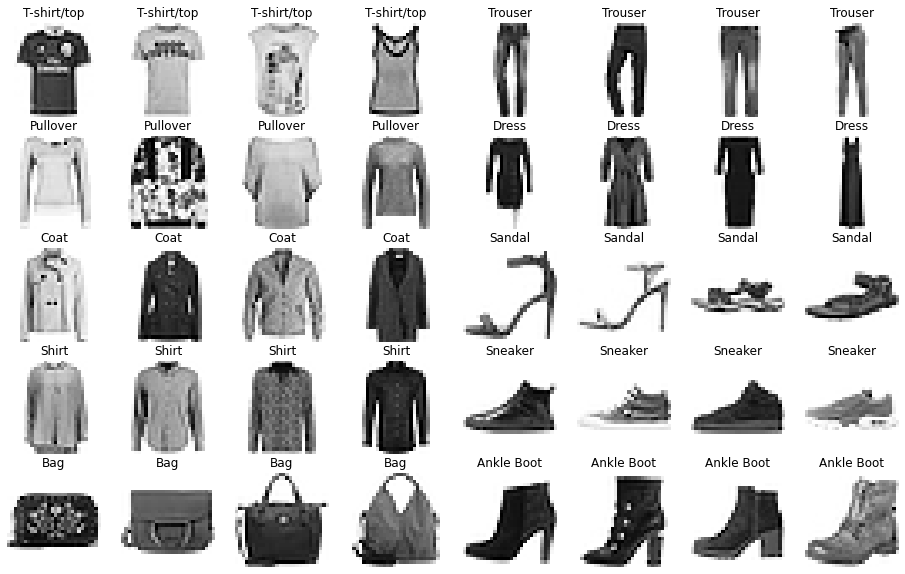

In [16]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Greys"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Greys")

Total number of sample images to plot:  40


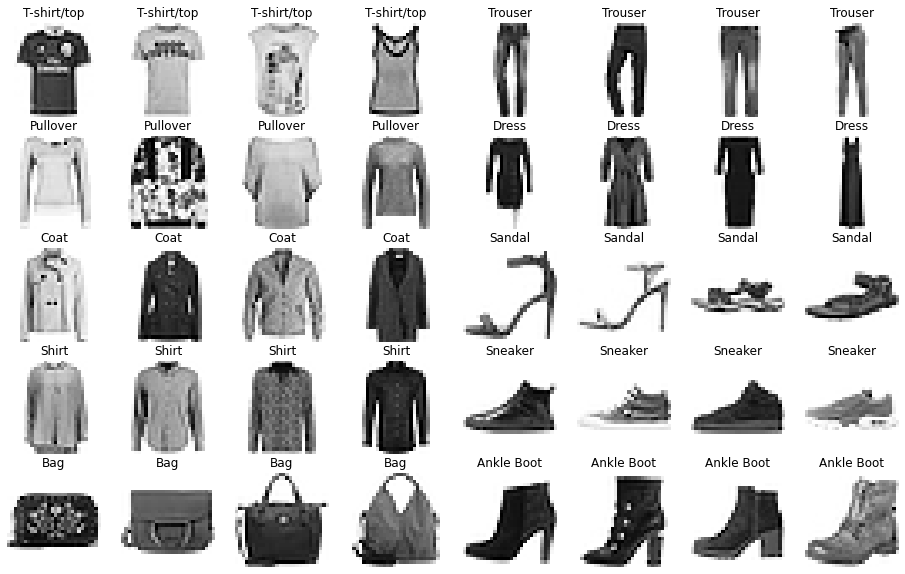

In [17]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels,"Greys")

#Step06 ▶ Check the data for missing values or duplicates and carry out proper correction

In [18]:
NullInTrain=train_data.isnull().sum().sort_values(ascending=False)
print("Train : ",NullInTrain)
NullInTest=test_data.isnull().sum().sort_values(ascending=False)
print("Train : ",NullInTest)


Train :  label       0
pixel516    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel267    0
pixel784    0
Length: 785, dtype: int64
Train :  label       0
pixel516    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel267    0
pixel784    0
Length: 785, dtype: int64


#The data contains no Nulls


Let's check the Data Redundancy

In [19]:
print("Train : ",train_data.duplicated().sum())

Train :  1


In [20]:
#Just drop 'em
train_data.drop_duplicates( inplace = True)

In [21]:
print("Test : ",test_data.duplicated().sum())

Test :  1


In [23]:
test_data.drop_duplicates( inplace = True)

#Step07 ▶ Carry out the required corelation analysis ⛏

In [ ]:
print(train_data.corr())


In [ ]:
correlation_analysis=train_data.corr()
correlation_analysis.style.background_gradient(cmap='coolwarm')

#Step08 ▶ Data preprocessing process ⛑

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  pixel73  pixel74  pixel75  pixel76  pixel77  pixel78  pixel79  pixel80  pixel81  pixel82  pixel83  pixel84  pixel85  pixel86  pixel87  pixel88  pixel89  pixel90  pixel91  pixel92  pixel93  pixel94  pixel95  pixel96  pixel97  pixel98  pixel99  pixel100  pixel101  pixel102  pixel103  pixel104  pixel105  pixel106  pixel107  pixel108  pixel109  pixel110  p

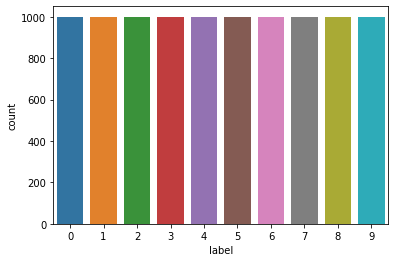

In [24]:
#check how the data is being splitted among different classes
g = sns.countplot(train_data['label'])
train_data.value_counts()

*Data is perfectly spreaded, no bias found*

---



#Check if label encoding is needed ❓

In [25]:
print(train_data.label)

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 9999, dtype: int64


In [26]:
#check if a categorical labels exists
cols = train_data.columns
num_cols = train_data._get_numeric_data().columns #I will first get the numeric ones
Categorical=list(set(cols) - set(num_cols))
print('The number of Categorical classes is :',len(Categorical))

The number of Categorical classes is : 0


In [27]:
def data_preprocessing(raw):
    num_classes = 10
    img_rows, img_cols = 28, 28
    out_y = pd.get_dummies(np.array(raw.iloc[:, 0])) #raw.label
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    x_shaped_array=x_shaped_array.astype('float32')
    out_x = x_shaped_array / 255
    return out_x, out_y


In [28]:
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

# Perform one-hot encoding 

In [29]:
# y = to_categorical(y, num_classes=10)
# y_test = to_categorical(y_test, num_classes=10)



In [30]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)

In [31]:
#display the new dimensions resulted from the data splitting: 
print("training set size",x_train.shape[0], x_train.shape[1:5])
print("validation set size",x_val.shape[0], x_val.shape[1:5])
print("test set size",X_test.shape[0]," columns:", X_test.shape[1:5])

training set size 7999 (28, 28, 1)
validation set size 2000 (28, 28, 1)
test set size 9999  columns: (28, 28, 1)


#Step09 ▶ Defining the CNN architecture - LeNET - Trial 01 ✅


In [32]:
num_classes = 10

model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5),strides=(1,1), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(16, kernel_size=(5, 5),strides=(1,1), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Flatten())

model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation = 'softmax'))

2022-04-07 02:17:33.513517: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


#Model Compiling

In [33]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

#Model summarising 

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0

#Fitting model to training data

In [35]:
from sklearn.model_selection import cross_val_score,KFold
model1 = model.fit(x_train, y_train,
                    batch_size=512,
                    epochs=5,
                    validation_data=(x_val, y_val),
                    verbose=0)
#x_train, x_val, y_train, y_val

2022-04-07 02:17:42.623645: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7221 - accuracy: 0.7327


In [37]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7220759987831116
Test accuracy: 0.7326732873916626


# plot the convergence curve for LeNet

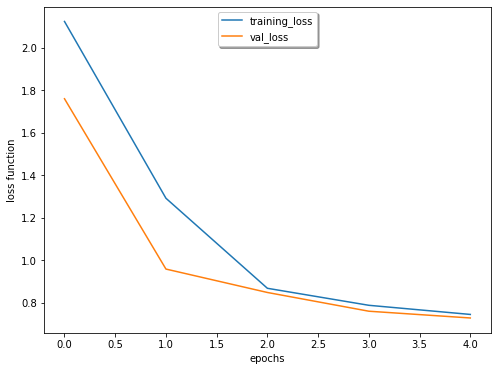

In [38]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(model1.history["loss"], label = "training_loss")
ax.plot(model1.history["val_loss"], label = "val_loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
ax.legend(loc = 'upper center', shadow = True,)
plt.show()

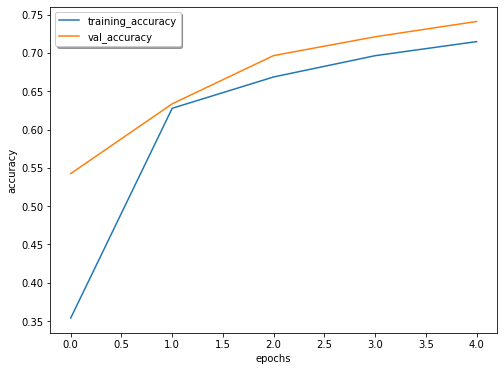

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(model1.history["accuracy"], label = "training_accuracy")
ax.plot(model1.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
ax.legend(loc = 'best', shadow = True,)
plt.show()

#Obtained Accuracy from trial01 is :- 73% 💪



#Step09 ▶ Defining the CNN architecture - LeNET - Trial 02 ✅

In [40]:
num_classes = 10

model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5),strides=(1,1), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(16, kernel_size=(5, 5),strides=(1,1), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Flatten())

model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation = 'softmax'))
#####
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
flatten_3 (Flatten)          (None, 120)              

In [41]:
from sklearn.model_selection import cross_val_score,KFold
model1 = model.fit(x_train, y_train,
                    batch_size=512,
                    epochs=100,
                    validation_data=(x_val, y_val),
                    verbose=0)
#x_train, x_val, y_train, y_val
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3121 - accuracy: 0.8865
Test loss: 0.31208106875419617
Test accuracy: 0.886488676071167


# plot the convergence curve for LeNet

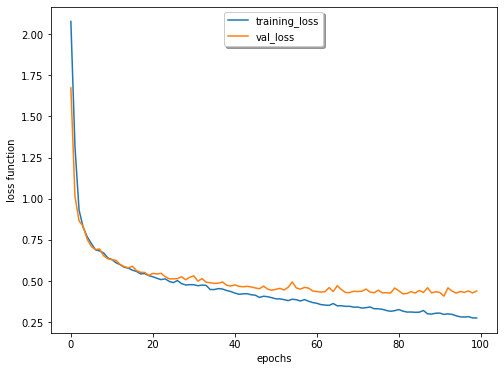

In [42]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(model1.history["loss"], label = "training_loss")
ax.plot(model1.history["val_loss"], label = "val_loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
ax.legend(loc = 'upper center', shadow = True,)
plt.show()

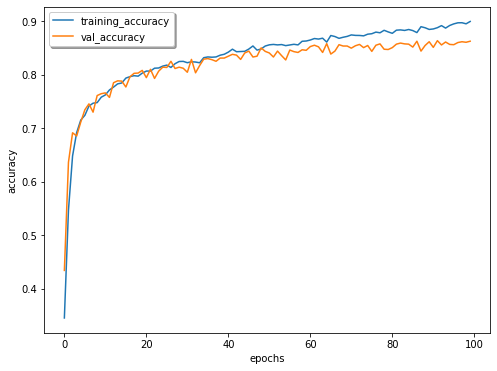

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(model1.history["accuracy"], label = "training_accuracy")
ax.plot(model1.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
ax.legend(loc = 'best', shadow = True,)
plt.show()

#Obtained Accuracy from trial02 is :- 88% 💪



#Step09 ▶ Defining the CNN architecture - LeNET 5- Trial 03 ✅

In [44]:
num_classes = 10

model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5),strides=(1,1), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(16, kernel_size=(5, 5),strides=(1,1), activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))
model.add(Flatten())

model.add(Dense(84, activation='tanh'))

model.add(Dense(num_classes, activation = 'softmax'))
#####
model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               30840     
_________________________________________________________________
flatten_5 (Flatten)          (None, 120)              

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model1 = model.fit(x_train, y_train,
                    batch_size=512,
                    epochs=150,
                    validation_data=(x_val, y_val),
                    verbose=0)
#x_train, x_val, y_train, y_val


score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.1446 - accuracy: 0.9652
Test loss: 0.14457498490810394
Test accuracy: 0.9651964902877808


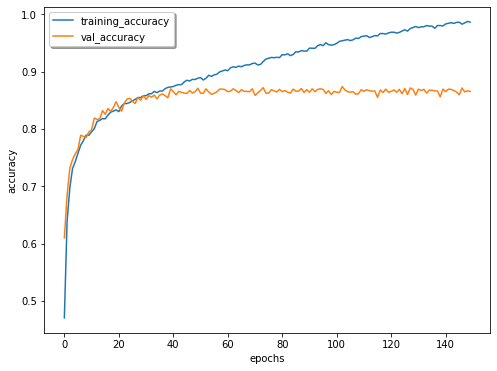

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(model1.history["accuracy"], label = "training_accuracy")
ax.plot(model1.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
ax.legend(loc = 'best', shadow = True,)
plt.show()

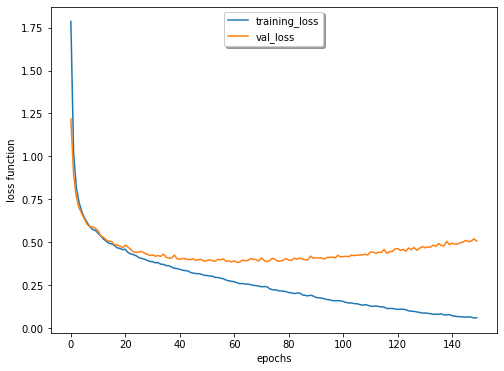

In [47]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(model1.history["loss"], label = "training_loss")
ax.plot(model1.history["val_loss"], label = "val_loss")
plt.xlabel("epochs")
plt.ylabel("loss function")
ax.legend(loc = 'upper center', shadow = True,)
plt.show()

# Obtained Accuracy from trial03 is :- 96%🥲



# Step09 ▶ Defining the CNN architecture - LeNET - Trial 04 ✅

In [48]:
num_classes = 10

model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5),strides=(1,1), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(16, kernel_size=(5, 5),strides=(1,1), activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(120, activation='tanh'))
model.add(Flatten())

model.add(Dense(84, activation='tanh'))

model.add(Dense(num_classes, activation = 'softmax'))
#####
model.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               30840     
_________________________________________________________________
flatten_7 (Flatten)          (None, 120)              

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model1 = model.fit(x_train, y_train,
                    batch_size=1024,
                    epochs=100,
                    validation_data=(x_val, y_val),
                    verbose=0)
#x_train, x_val, y_train, y_val
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2999 - accuracy: 0.8918
Test loss: 0.2998897135257721
Test accuracy: 0.8917891979217529


# Obtained Accuracy from trial04 is :- 89% 💪



# Evaluating model with a test data using 5-fold cross-validation 😌

In [50]:
# model with padded convolutions for the fashion mnist dataset
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 #x_train, x_val, y_train, y_val
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('Test Accuracy: ','> %.3f' % (acc * 100.0))
		# append scores
		scores.append(acc)
		histories.append(history)
	return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()
 
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()
 

4431872/4422102 [==============================] - 0s 0us/step


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Test Accuracy:  > 90.975
Test Accuracy:  > 90.317
Test Accuracy:  > 91.258
Test Accuracy:  > 90.275
Test Accuracy:  > 91.283


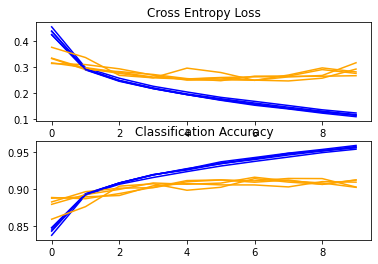

Accuracy: mean=90.822 std=0.443, n=5


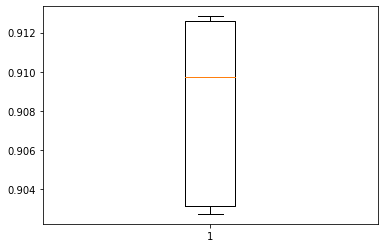

In [51]:
trainX, trainY, testX, testY = load_dataset()
trainX, testX = prep_pixels(trainX, testX)
# evaluate model
scores, histories = evaluate_model(trainX, trainY)
# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)

# Obtained Accuracy from 5-folds-cross-validation trial is :- 91% 💪
Best Accuracy 



# Step 9.1 ▶ Defininf the CNN architecture- AlexNet- Trial01 ✅ 😌

In [52]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import TensorBoard

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
import time

In [53]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 
train_data= np.array(train_data, dtype= 'float32')
test_data= np.array(test_data, dtype= 'float32')
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0] 

In [54]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)
x_train.shape, x_validate.shape,y_train.shape,y_validate.shape 

((7999, 784), (2000, 784), (7999,), (2000,))

In [55]:
x_train= x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)
x_train.shape, x_test.shape, x_validate.shape

((7999, 28, 28, 1), (9999, 28, 28, 1), (2000, 28, 28, 1))

In [56]:
# Alexnet
model= tf.keras.Sequential([Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation= 'relu', input_shape= image_shape),
                                      BatchNormalization(),
                                      MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
                                      Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same'),
                                      BatchNormalization(),
                                      MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
                                      Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
                                      BatchNormalization(),
                                      Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
                                      BatchNormalization(),
                                      Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
                                      BatchNormalization(),
                                      MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'),
                                      Flatten(),
                                      Dense(4096, activation='relu'),
                                      Dropout(0.5),
                                      Dense(4096, activation='relu'),
                                      Dropout(0.5),
                                      Dense(10, activation='softmax')
                                      ])

In [57]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 5, 5, 96)          11712     
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 5, 96)          384       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 96)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 384)        

In [58]:
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [59]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min')

history= model.fit(x_train, y_train, epochs=3, verbose=1, callbacks=[early_stopping_cb],
          validation_data=(x_validate, y_validate))

Epoch 1/3
250/250 [==============================] - 52s 204ms/step - loss: 0.9288 - accuracy: 0.6641 - val_loss: 2.3985 - val_accuracy: 0.1755
Epoch 2/3
250/250 [==============================] - 51s 204ms/step - loss: 0.5878 - accuracy: 0.7878 - val_loss: 0.5935 - val_accuracy: 0.7975
Epoch 3/3
250/250 [==============================] - 50s 200ms/step - loss: 0.5017 - accuracy: 0.8174 - val_loss: 0.4859 - val_accuracy: 0.8245


In [60]:
model_evaluation_results = model.evaluate(x_test, y_test, batch_size=32, verbose=2)
print("The test loss is", model_evaluation_results[0])
print("The test accuracy is", model_evaluation_results[1])

313/313 - 14s - loss: 0.4312 - accuracy: 0.8407
The test loss is 0.43115609884262085
The test accuracy is 0.8406840562820435


In [61]:
practical_test_images =  x_test[:10]
prediction_probabilites = model.predict(practical_test_images)
prediction_probabilites[:3]

array([[6.0052925e-01, 8.6278538e-04, 3.7911420e-03, 1.0504820e-02,
        4.2679952e-03, 1.0916432e-03, 3.6997059e-01, 6.4101390e-04,
        6.9563659e-03, 1.3844349e-03],
       [3.2592918e-05, 9.9972028e-01, 2.5279776e-05, 1.5445461e-04,
        2.8265658e-05, 9.1343090e-06, 1.2556478e-05, 4.7766539e-06,
        9.2549117e-06, 3.3477634e-06],
       [6.1412426e-03, 9.8967610e-04, 9.0830958e-01, 1.7653866e-03,
        1.7983887e-02, 4.1291383e-04, 6.2397409e-02, 1.9614340e-04,
        1.4809452e-03, 3.2292694e-04]], dtype=float32)

Text(0.5, 1.0, 'Train - Accuracy')

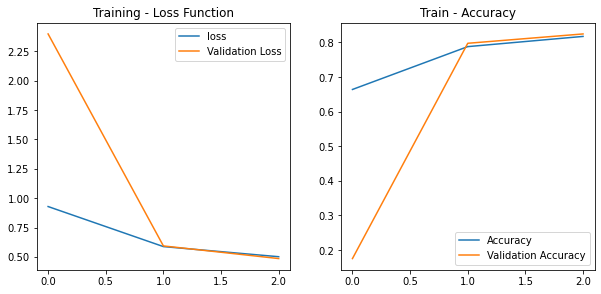

In [62]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

# Obtained Accuracy from trial01 is :- 84% 💪



# Step 9.2 ▶ Defininf the CNN architecture- AlexNet- Trial02 ✅ 😌

In [65]:
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [66]:
# It's time to train!
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min')

history= model.fit(x_train, y_train, epochs=10, verbose=1, callbacks=[early_stopping_cb],
          validation_data=(x_validate, y_validate)) 

Epoch 1/10
250/250 [==============================] - 52s 203ms/step - loss: 0.3516 - accuracy: 0.8689 - val_loss: 0.4167 - val_accuracy: 0.8530
Epoch 2/10
250/250 [==============================] - 51s 202ms/step - loss: 0.3351 - accuracy: 0.8742 - val_loss: 0.4120 - val_accuracy: 0.8500
Epoch 3/10
250/250 [==============================] - 49s 197ms/step - loss: 0.3104 - accuracy: 0.8834 - val_loss: 0.4081 - val_accuracy: 0.8640
Epoch 4/10
250/250 [==============================] - 50s 200ms/step - loss: 0.3042 - accuracy: 0.8862 - val_loss: 0.5023 - val_accuracy: 0.8445
Epoch 5/10
250/250 [==============================] - 49s 197ms/step - loss: 0.2781 - accuracy: 0.8940 - val_loss: 0.5199 - val_accuracy: 0.8300
Epoch 6/10
250/250 [==============================] - 50s 202ms/step - loss: 0.2629 - accuracy: 0.9016 - val_loss: 0.4646 - val_accuracy: 0.8545
Epoch 7/10
250/250 [==============================] - 50s 200ms/step - loss: 0.2549 - accuracy: 0.9037 - val_loss: 0.4287 - val_ac

In [67]:
model_evaluation_results = model.evaluate(x_test, y_test, batch_size=32, verbose=2)
print("The test loss is", model_evaluation_results[0])
print("The test accuracy is", model_evaluation_results[1])

313/313 - 14s - loss: 0.2414 - accuracy: 0.9129
The test loss is 0.24142207205295563
The test accuracy is 0.9128912687301636


In [68]:
practical_test_images =  x_test[:10]
prediction_probabilites = model.predict(practical_test_images)
prediction_probabilites[:3]

array([[9.5586467e-01, 7.0984046e-05, 1.7523090e-04, 1.3932566e-03,
        3.6310332e-05, 2.2846431e-05, 4.2295177e-02, 3.9608887e-05,
        8.5248721e-05, 1.6657819e-05],
       [9.7319157e-09, 9.9999988e-01, 3.5095791e-09, 7.1207992e-08,
        1.6744949e-09, 5.1217901e-09, 4.8853175e-09, 1.5764334e-09,
        7.2908142e-09, 1.2069242e-09],
       [2.3776707e-03, 1.7036800e-04, 9.6852601e-01, 5.6904269e-04,
        2.7962395e-03, 6.1950726e-05, 2.5028182e-02, 2.3566825e-05,
        4.0904703e-04, 3.7975977e-05]], dtype=float32)

Text(0.5, 1.0, 'Train - Accuracy')

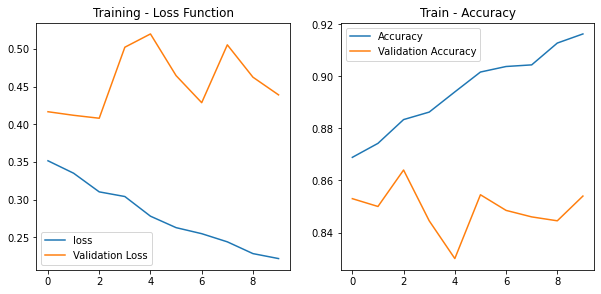

In [69]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

# Obtained Accuracy from trial01 is :- 0.91
% 💪



# Step 10.1 ▶ Define the CNN architecture- xxxxx- Trial01 ✅ 😌


In [76]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/model3/data/test/7/6490.png
/kaggle/input/model3/data/test/7/2823.png
/kaggle/input/model3/data/test/7/7726.png
/kaggle/input/model3/data/test/7/1479.png
/kaggle/input/model3/data/test/7/9767.png
/kaggle/input/model3/data/test/7/3448.png
/kaggle/input/model3/data/test/7/7236.png
/kaggle/input/model3/data/test/7/2982.png
/kaggle/input/model3/data/test/7/8514.png
/kaggle/input/model3/data/test/7/8947.png
/kaggle/input/model3/data/test/7/2772.png
/kaggle/input/model3/data/test/7/3550.png
/kaggle/input/model3/data/test/7/1145.png
/kaggle/input/model3/data/test/7/8811.png
/kaggle/input/model3/data/test/7/9774.png
/kaggle/input/model3/data/test/7/3012.png
/kaggle/input/model3/data/test/7/9444.png
/kaggle/input/model3/data/test/7/2565.png
/kaggle/input/model3/data/test/7/9125.png
/kaggle/input/model3/data/test/7/5858.png
/kaggle/input/model3/data/test/7/6910.png
/kaggle/input/model3/data/test/7/61.png
/kaggle/input/model3/data/test/7/9486.png
/kaggle/input/model3/data/test/7/733

In [77]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_label),(test_images,test_label)=fashion_mnist.load_data()

In [78]:
from keras.utils import np_utils
pt_x_train = []
pt_y_train = []
pt_x_test = []
pt_y_test = []

tl_x_train = []
tl_y_train = []
tl_x_test = []
tl_y_test = []

m=60000

for i in range(m):
    if train_label[i] < 5:
        pt_x_train.append(train_images[i] / 255)
        pt_y_train.append(train_label[i])
    else:
        tl_x_train.append(train_images[i] / 255)
        tl_y_train.append(train_label[i])

m2 = 10000

for i in range(m2):
    if test_label[i] < 5:
        pt_x_test.append(test_images[i] / 255)
        pt_y_test.append(test_label[i])
    else:
        tl_x_test.append(test_images[i] / 255)
        tl_y_test.append(test_label[i])
                         
pt_x_train = np.asarray(pt_x_train).reshape(-1,28,28,1)
pt_x_test = np.asarray(pt_x_test).reshape(-1,28,28,1)
pt_y_train = np_utils.to_categorical(np.asarray(pt_y_train))
pt_y_test = np_utils.to_categorical(np.asarray(pt_y_test))

tl_x_train = np.asarray(tl_x_train).reshape(-1,28,28,1)
tl_x_test = np.asarray(tl_x_test).reshape(-1,28,28,1)
tl_y_train = np_utils.to_categorical(np.asarray(tl_y_train))
tl_y_test = np_utils.to_categorical(np.asarray(tl_y_test))

                         
print(pt_x_train.shape,pt_y_train.shape)
print(pt_x_test.shape,pt_y_test.shape)

print(tl_x_train.shape,tl_y_train.shape)
print(tl_x_test.shape,tl_y_test.shape)   

(30000, 28, 28, 1) (30000, 5)
(5000, 28, 28, 1) (5000, 5)
(30000, 28, 28, 1) (30000, 10)
(5000, 28, 28, 1) (5000, 10)


In [79]:
from keras.models import Sequential,Model
from keras.layers import Conv2D,Dense,Activation,MaxPool2D,Dropout,Flatten
model = Sequential()

# (28,28,1)

model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu'))
# (24,24,32)

model.add(Conv2D(16,(5,5),activation='relu'))
# (20,20,16)

model.add(MaxPool2D(pool_size=(2,2)))
# (10,10,16)

model.add(Conv2D(8,(3,3),activation='relu'))
# (8,8,8)

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 8)           1160      
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)             

In [80]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [81]:
model.fit(pt_x_train,pt_y_train,
         validation_data=(pt_x_test,pt_y_test),
         epochs=10,
         batch_size=100,
         verbose=2,
         shuffle=True)

Epoch 1/10
300/300 - 14s - loss: 0.5244 - accuracy: 0.7942 - val_loss: 0.3271 - val_accuracy: 0.8774
Epoch 2/10
300/300 - 15s - loss: 0.3144 - accuracy: 0.8871 - val_loss: 0.2647 - val_accuracy: 0.9062
Epoch 3/10
300/300 - 13s - loss: 0.2680 - accuracy: 0.9049 - val_loss: 0.2540 - val_accuracy: 0.9080
Epoch 4/10
300/300 - 14s - loss: 0.2506 - accuracy: 0.9105 - val_loss: 0.2149 - val_accuracy: 0.9238
Epoch 5/10
300/300 - 14s - loss: 0.2305 - accuracy: 0.9174 - val_loss: 0.2099 - val_accuracy: 0.9240
Epoch 6/10
300/300 - 14s - loss: 0.2165 - accuracy: 0.9224 - val_loss: 0.2048 - val_accuracy: 0.9270
Epoch 7/10
300/300 - 14s - loss: 0.2061 - accuracy: 0.9251 - val_loss: 0.1986 - val_accuracy: 0.9280
Epoch 8/10
300/300 - 13s - loss: 0.1967 - accuracy: 0.9296 - val_loss: 0.1956 - val_accuracy: 0.9308
Epoch 9/10
300/300 - 14s - loss: 0.1911 - accuracy: 0.9300 - val_loss: 0.1899 - val_accuracy: 0.9314
Epoch 10/10
300/300 - 14s - loss: 0.1839 - accuracy: 0.9332 - val_loss: 0.1907 - val_accura

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

score = model.evaluate(pt_x_test, pt_y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

157/157 [==============================] - 1s 7ms/step - loss: 0.1907 - accuracy: 0.9320
Test loss: 0.19070512056350708
Test accuracy: 0.9319999814033508


# The obtained accuracy from this trial is : 93 %.

# Trial 2 after tuning some parameters

In [83]:
for layer in model.layers[:5]:
    layer.trainable = False

In [84]:
x = model.layers[4].output
x = Dropout(0.5)(x)
x = Dense(32,activation='relu')(x)
x = Dense(16,activation='relu')(x)
predictions = Dense(10,activation='softmax')(x)
tl_model = Model(model.input,predictions)
tl_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 20, 20, 16)        12816     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 8)           1160      
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0     

In [85]:
tl_model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

tl_model.fit(tl_x_train,tl_y_train,
            validation_data=(tl_x_test,tl_y_test),
            batch_size=100,
            epochs=10,
            verbose=2,
            shuffle=True)

Epoch 1/10
300/300 - 5s - loss: 0.5686 - accuracy: 0.8155 - val_loss: 0.1863 - val_accuracy: 0.9336
Epoch 2/10
300/300 - 5s - loss: 0.2110 - accuracy: 0.9253 - val_loss: 0.1598 - val_accuracy: 0.9438
Epoch 3/10
300/300 - 5s - loss: 0.1971 - accuracy: 0.9293 - val_loss: 0.1471 - val_accuracy: 0.9482
Epoch 4/10
300/300 - 5s - loss: 0.1821 - accuracy: 0.9349 - val_loss: 0.1465 - val_accuracy: 0.9510
Epoch 5/10
300/300 - 5s - loss: 0.1755 - accuracy: 0.9368 - val_loss: 0.1345 - val_accuracy: 0.9542
Epoch 6/10
300/300 - 6s - loss: 0.1700 - accuracy: 0.9386 - val_loss: 0.1299 - val_accuracy: 0.9544
Epoch 7/10
300/300 - 5s - loss: 0.1641 - accuracy: 0.9418 - val_loss: 0.1258 - val_accuracy: 0.9548
Epoch 8/10
300/300 - 5s - loss: 0.1629 - accuracy: 0.9414 - val_loss: 0.1275 - val_accuracy: 0.9588
Epoch 9/10
300/300 - 5s - loss: 0.1558 - accuracy: 0.9427 - val_loss: 0.1281 - val_accuracy: 0.9578
Epoch 10/10
300/300 - 5s - loss: 0.1529 - accuracy: 0.9451 - val_loss: 0.1290 - val_accuracy: 0.9564

In [86]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

score = model.evaluate(pt_x_test, pt_y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

157/157 [==============================] - 1s 7ms/step - loss: 0.1907 - accuracy: 0.9320
Test loss: 0.19070512056350708
Test accuracy: 0.9319999814033508


# The obtained accuracy from this trial is : 93 %.